## Notebook 2.5: Daylily Variety Trait Exploration
### Understanding Trait Trends Across 100,000+ Registered Varieties

This notebook explores how daylily traits have evolved over time:
- Quantitative trait trends (scape height, bloom size, bud count, branches)
- Categorical trait distributions (ploidy, foliage type, bloom season)
- Rebloom prevalence over time
- Registration volume patterns

In [3]:
# Imports
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Connect to database and load data
conn = sqlite3.connect('daylilies.db')
df = pd.read_sql_query("SELECT * FROM daylilies", conn)
conn.close()

# Get date range for dynamic labeling
MIN_YEAR = int(df['year'].min())
MAX_YEAR = int(df['year'].max())
MODERN_START = 1950  # When systematic registration began

# Display basic information
print("Dataset Overview:")
print(f"Total varieties: {len(df):,}")
print(f"Date range: {MIN_YEAR} - {MAX_YEAR}")
print(f"Unique hybridizers: {df['hybridizer'].nunique():,}")
print(f"\nSample of the data:")
display(df.head())

Dataset Overview:
Total varieties: 103,616
Date range: 1762 - 2025
Unique hybridizers: 5,418

Sample of the data:


,url,name,hybridizer,year,scape_height,bloom_size,bloom_season,ploidy,foliage_type,bloom_habit,...,seedling_num,color_description,parentage,image_url,fragrance,form,awards,sculpting,notes,rebloom
0,https://daylilydatabase.org/detail.php?id=1567...,Orange Clown,Goldner-Webster,2007.0,32.0,9.0,Late,Tetraploid,Semi-Evergreen,Diurnal,...,AG-OC-1,blended orange with dark red orange halo above...,(sdlg × sdlg),https://daylilydatabase.org/AHSPhoto/O/Orange_...,Fragrant,Unusual FormCrispate,HM 2020,None,None,0
1,https://daylilydatabase.org/detail.php?id=1458...,Firefly Frenzy,Joiner-J.,2002.0,30.0,8.0,Midseason,Diploid,Evergreen,Diurnal,...,J99-DD-SD-107,lemon drop self above light green throat,(sdlg × sdlg),https://daylilydatabase.org/AHSPhoto/F/Firefly...,Very Fragrant,Unusual FormCrispateDouble 98%,AM 2009; HM 2005; IM 2011; L/W 2016; NRS 2021,None,None,1
2,https://daylilydatabase.org/detail.php?id=1445...,Small World Blue Rainbow,Miller-M.,2001.0,36.0,6.5,Midseason,Tetraploid,Dormant,Diurnal,...,sw 98 t 21,lavender with blue and purple eye and edge abo...,(Scandalous × Angel's Smile),https://daylilydatabase.org/AHSPhoto/S/small_w...,Fragrant,Unusual FormCrispate,HM 2007,None,None,1
3,https://daylilydatabase.org/detail.php?id=1715...,Webster's Purple Wonder,Webster-Cobb-Gossard,2012.0,36.0,9.5,Midseason,Tetraploid,Dormant,Diurnal,...,trs-3,maroon purple with a green throat,(Richard Webster × Webster's Thunderbolt),https://daylilydatabase.org/AHSPhoto/W/Webster...,Fragrant,Unusual FormCrispate-Cascade,HM 2015,None,None,1
4,https://daylilydatabase.org/detail.php?id=1715...,Cheddar Explosion,Gossard-D.,2013.0,41.0,6.0,Midseason,Tetraploid,Dormant,Diurnal,...,CBDABGARBSM,cheddar cheese orange,((Cardigan Bay × Imperial Coronation) × (Alexa...,https://daylilydatabase.org/AHSPhoto/C/cheddar...,Very Fragrant,Double 99%,AM 2022; HM 2019,None,None,1


### Registration Volume Over Time
How has the pace of new variety introductions changed?

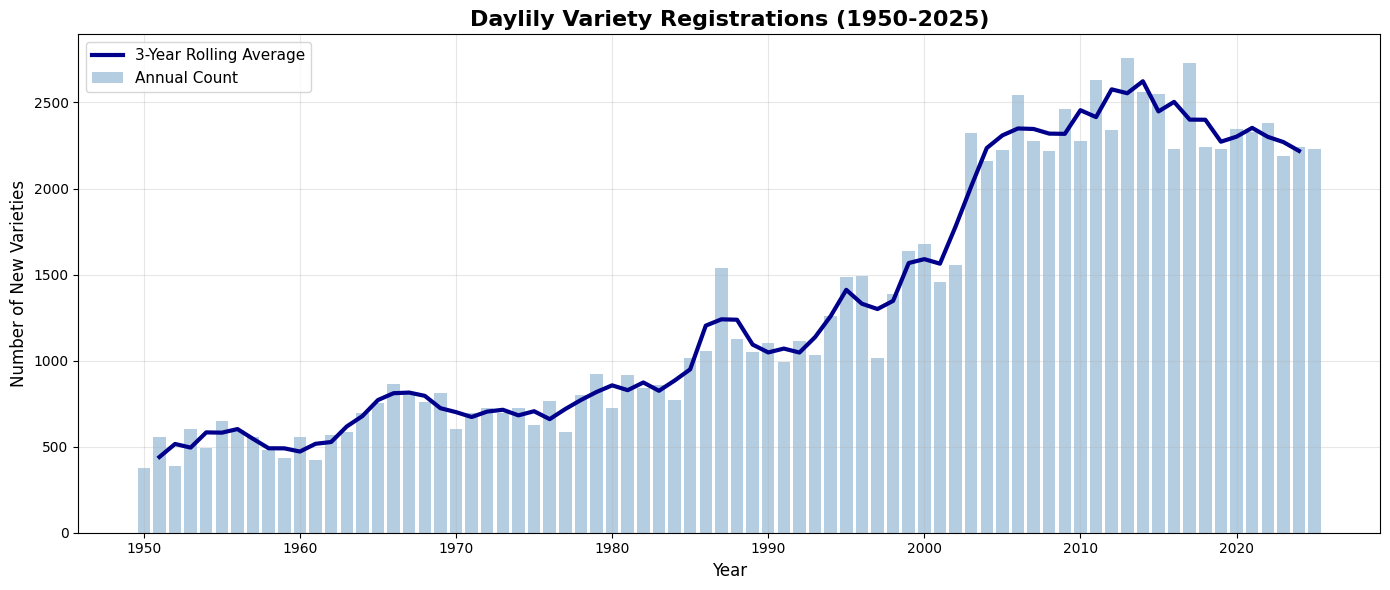

Peak registration year: 2013 with 2,758 varieties
Most recent year (2025): 2,229 varieties


In [5]:
# Annual registration counts (modern era)
modern_df = df[df['year'] >= MODERN_START].copy()
annual_registrations = modern_df.groupby('year').size().reset_index(name='count')

# 3-year rolling average for smoothing
annual_registrations['rolling_avg'] = annual_registrations['count'].rolling(window=3, center=True).mean()

# Create visualization
plt.figure(figsize=(14, 6))
plt.bar(annual_registrations['year'], annual_registrations['count'], 
        alpha=0.4, color='steelblue', label='Annual Count')
plt.plot(annual_registrations['year'], annual_registrations['rolling_avg'], 
         linewidth=3, color='darkblue', label='3-Year Rolling Average')

plt.title(f'Daylily Variety Registrations ({MODERN_START}-{MAX_YEAR})', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of New Varieties', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Key statistics
peak_year = annual_registrations.loc[annual_registrations['count'].idxmax()]
recent = annual_registrations[annual_registrations['year'] == MAX_YEAR].iloc[0]
print(f"Peak registration year: {int(peak_year['year'])} with {int(peak_year['count']):,} varieties")
print(f"Most recent year ({int(recent['year'])}): {int(recent['count']):,} varieties")

### Quantitative Trait Trends
How have measurable traits like height, bloom size, and bud count evolved?

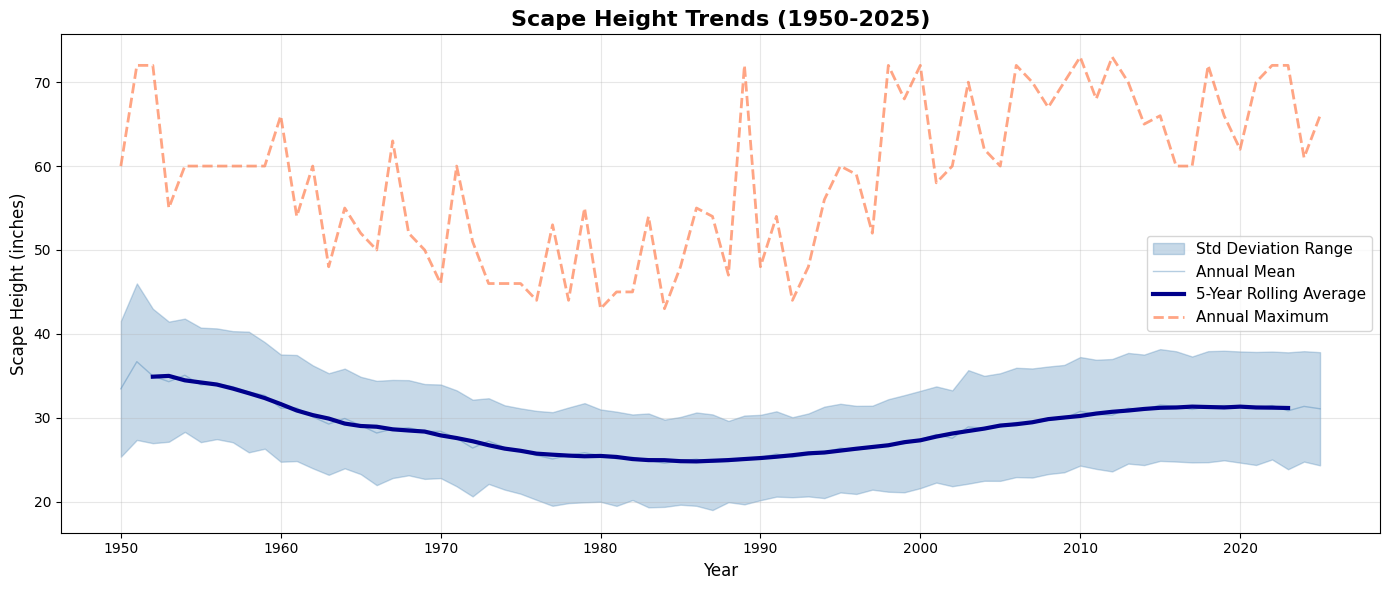

Average scape height: 29.1 inches
Range: 2 - 73 inches


In [6]:
# Scape Height Trends
height_df = modern_df[modern_df['scape_height'].notna()].copy()
height_stats = height_df.groupby('year')['scape_height'].agg(['mean', 'std', 'max']).reset_index()

# 5-year rolling average
height_stats['rolling_mean'] = height_stats['mean'].rolling(window=5, center=True).mean()

plt.figure(figsize=(14, 6))
plt.fill_between(height_stats['year'], 
                 height_stats['mean'] - height_stats['std'],
                 height_stats['mean'] + height_stats['std'],
                 alpha=0.3, color='steelblue', label='Std Deviation Range')
plt.plot(height_stats['year'], height_stats['mean'], 
         alpha=0.4, color='steelblue', linewidth=1, label='Annual Mean')
plt.plot(height_stats['year'], height_stats['rolling_mean'], 
         linewidth=3, color='darkblue', label='5-Year Rolling Average')
plt.plot(height_stats['year'], height_stats['max'], 
         linewidth=2, color='coral', alpha=0.7, linestyle='--', label='Annual Maximum')

plt.title(f'Scape Height Trends ({MODERN_START}-{MAX_YEAR})', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Scape Height (inches)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average scape height: {height_df['scape_height'].mean():.1f} inches")
print(f"Range: {height_df['scape_height'].min():.0f} - {height_df['scape_height'].max():.0f} inches")

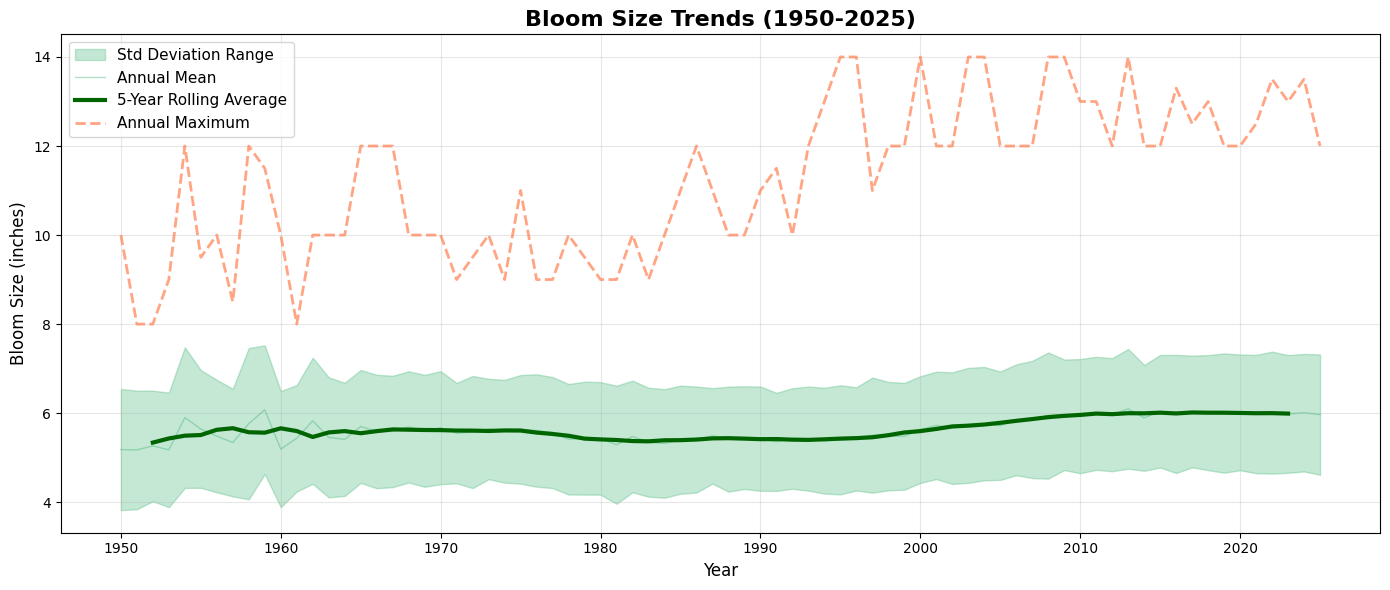

Average bloom size: 5.76 inches
Range: 1.0 - 14.0 inches


In [7]:
# Bloom Size Trends (excluding outliers > 15 inches)
bloom_df = modern_df[(modern_df['bloom_size'].notna()) & (modern_df['bloom_size'] <= 15)].copy()
bloom_stats = bloom_df.groupby('year')['bloom_size'].agg(['mean', 'std', 'max']).reset_index()

# 5-year rolling average
bloom_stats['rolling_mean'] = bloom_stats['mean'].rolling(window=5, center=True).mean()

plt.figure(figsize=(14, 6))
plt.fill_between(bloom_stats['year'], 
                 bloom_stats['mean'] - bloom_stats['std'],
                 bloom_stats['mean'] + bloom_stats['std'],
                 alpha=0.3, color='mediumseagreen', label='Std Deviation Range')
plt.plot(bloom_stats['year'], bloom_stats['mean'], 
         alpha=0.4, color='mediumseagreen', linewidth=1, label='Annual Mean')
plt.plot(bloom_stats['year'], bloom_stats['rolling_mean'], 
         linewidth=3, color='darkgreen', label='5-Year Rolling Average')
plt.plot(bloom_stats['year'], bloom_stats['max'], 
         linewidth=2, color='coral', alpha=0.7, linestyle='--', label='Annual Maximum')

plt.title(f'Bloom Size Trends ({MODERN_START}-{MAX_YEAR})', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Bloom Size (inches)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average bloom size: {bloom_df['bloom_size'].mean():.2f} inches")
print(f"Range: {bloom_df['bloom_size'].min():.1f} - {bloom_df['bloom_size'].max():.1f} inches")

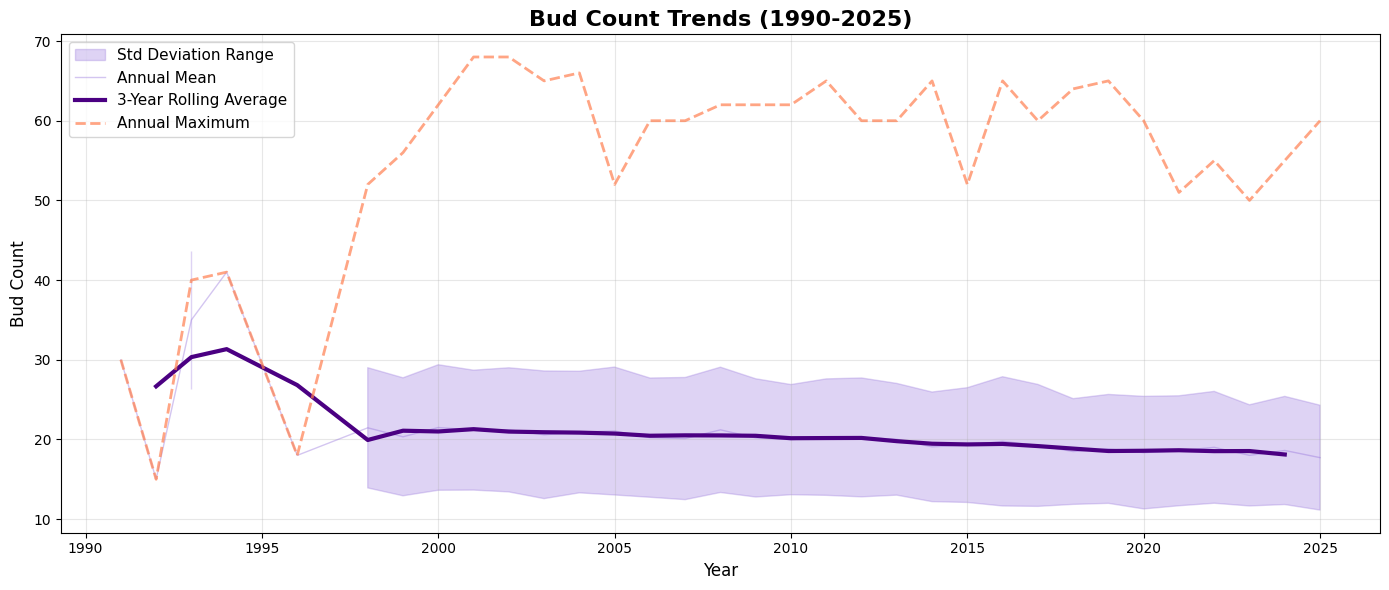

Average bud count: 19.7
Range: 1 - 68


In [8]:
# Bud Count Trends (data more complete after 1990)
BUD_START = 1990
bud_df = df[(df['year'] >= BUD_START) & (df['bud_count'].notna())].copy()
bud_stats = bud_df.groupby('year')['bud_count'].agg(['mean', 'std', 'max']).reset_index()

# 3-year rolling average
bud_stats['rolling_mean'] = bud_stats['mean'].rolling(window=3, center=True).mean()

plt.figure(figsize=(14, 6))
plt.fill_between(bud_stats['year'], 
                 bud_stats['mean'] - bud_stats['std'],
                 bud_stats['mean'] + bud_stats['std'],
                 alpha=0.3, color='mediumpurple', label='Std Deviation Range')
plt.plot(bud_stats['year'], bud_stats['mean'], 
         alpha=0.4, color='mediumpurple', linewidth=1, label='Annual Mean')
plt.plot(bud_stats['year'], bud_stats['rolling_mean'], 
         linewidth=3, color='indigo', label='3-Year Rolling Average')
plt.plot(bud_stats['year'], bud_stats['max'], 
         linewidth=2, color='coral', alpha=0.7, linestyle='--', label='Annual Maximum')

plt.title(f'Bud Count Trends ({BUD_START}-{MAX_YEAR})', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Bud Count', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average bud count: {bud_df['bud_count'].mean():.1f}")
print(f"Range: {bud_df['bud_count'].min():.0f} - {bud_df['bud_count'].max():.0f}")

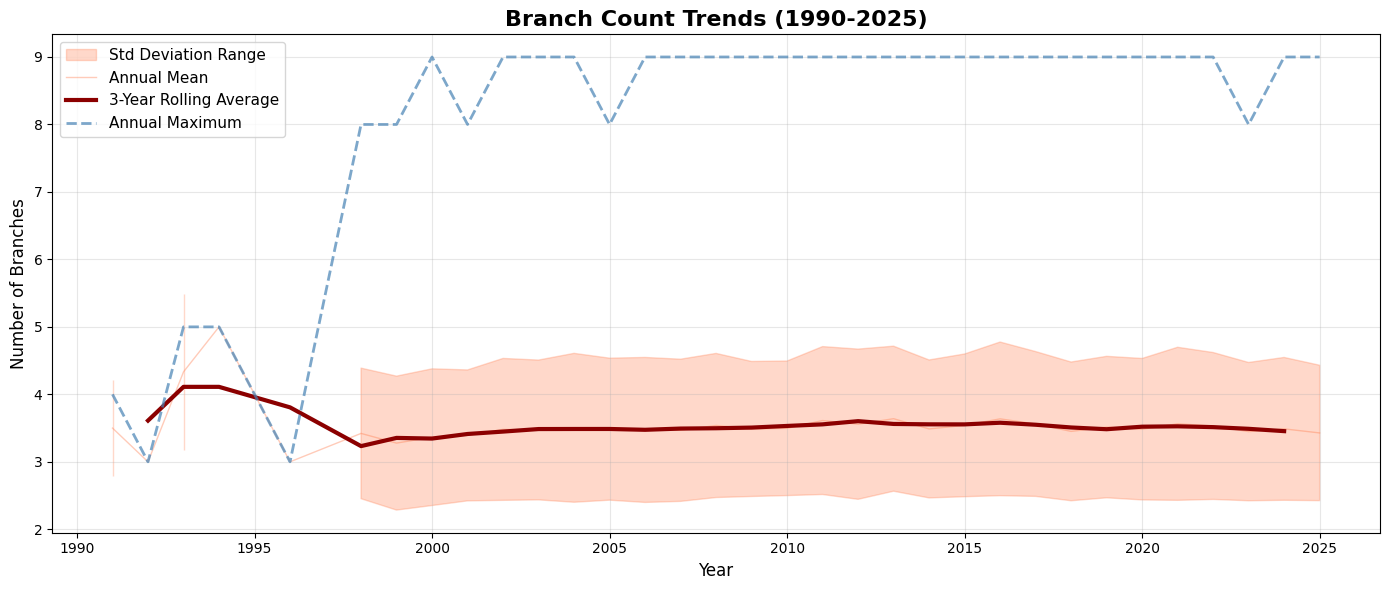

Average branch count: 3.50
Range: 1 - 9


In [9]:
# Branch Count Trends (excluding outliers > 10 branches)
BRANCH_START = 1990
branch_df = df[(df['year'] >= BRANCH_START) & 
               (df['branches'].notna()) & 
               (df['branches'] <= 10)].copy()
branch_stats = branch_df.groupby('year')['branches'].agg(['mean', 'std', 'max']).reset_index()

# 3-year rolling average
branch_stats['rolling_mean'] = branch_stats['mean'].rolling(window=3, center=True).mean()

plt.figure(figsize=(14, 6))
plt.fill_between(branch_stats['year'], 
                 branch_stats['mean'] - branch_stats['std'],
                 branch_stats['mean'] + branch_stats['std'],
                 alpha=0.3, color='coral', label='Std Deviation Range')
plt.plot(branch_stats['year'], branch_stats['mean'], 
         alpha=0.4, color='coral', linewidth=1, label='Annual Mean')
plt.plot(branch_stats['year'], branch_stats['rolling_mean'], 
         linewidth=3, color='darkred', label='3-Year Rolling Average')
plt.plot(branch_stats['year'], branch_stats['max'], 
         linewidth=2, color='steelblue', alpha=0.7, linestyle='--', label='Annual Maximum')

plt.title(f'Branch Count Trends ({BRANCH_START}-{MAX_YEAR})', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Branches', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average branch count: {branch_df['branches'].mean():.2f}")
print(f"Range: {branch_df['branches'].min():.0f} - {branch_df['branches'].max():.0f}")

### Categorical Trait Distributions Over Time
How have preferences for ploidy, foliage type, and bloom season shifted?

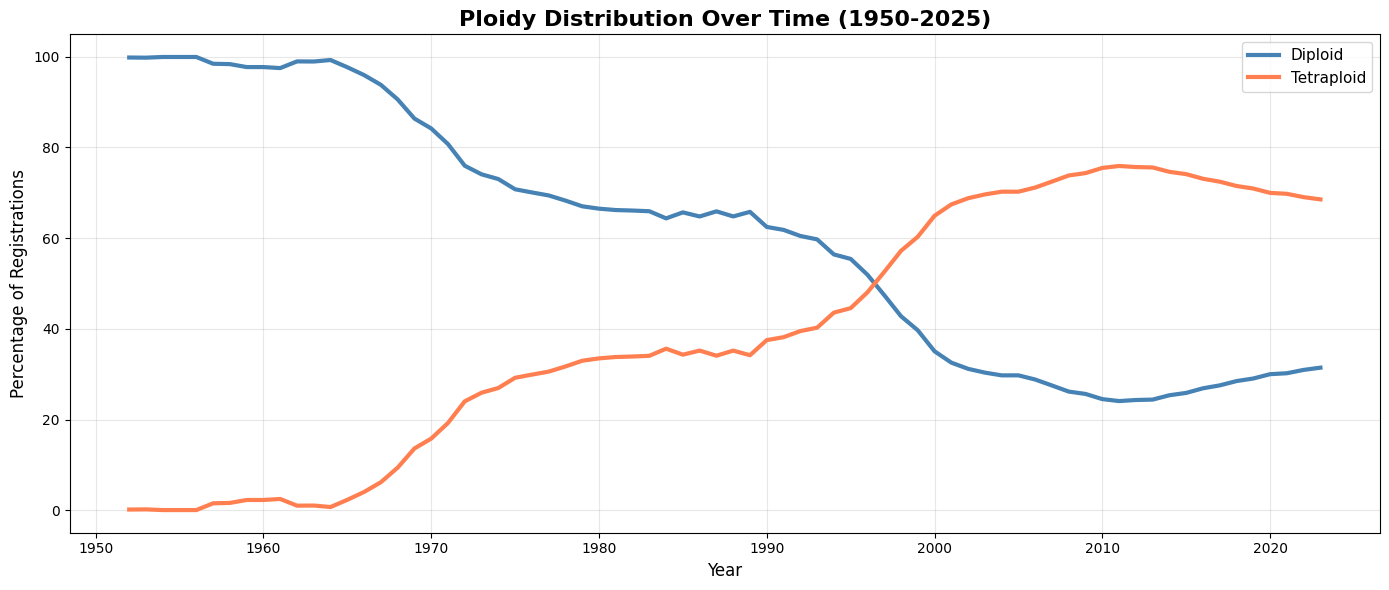

Recent distribution (last 5 years):
  Tetraploid: 68.9%
  Diploid: 31.1%


In [10]:
# Ploidy Distribution Over Time
ploidy_df = modern_df[modern_df['ploidy'].notna()].copy()
ploidy_yearly = ploidy_df.groupby('year')['ploidy'].value_counts(normalize=True).unstack(fill_value=0)

# 5-year rolling average for smoothing
ploidy_smooth = ploidy_yearly.rolling(window=5, center=True).mean()

plt.figure(figsize=(14, 6))
colors = {'Diploid': 'steelblue', 'Tetraploid': 'coral', 'Unknown': 'gray'}

for col in ploidy_smooth.columns:
    if col in colors:
        plt.plot(ploidy_smooth.index, ploidy_smooth[col] * 100, 
                 linewidth=3, label=col, color=colors.get(col, 'gray'))

plt.title(f'Ploidy Distribution Over Time ({MODERN_START}-{MAX_YEAR})', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Registrations', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Current distribution
recent_ploidy = ploidy_df[ploidy_df['year'] >= MAX_YEAR - 5]['ploidy'].value_counts(normalize=True) * 100
print(f"Recent distribution (last 5 years):")
for p, pct in recent_ploidy.items():
    print(f"  {p}: {pct:.1f}%")

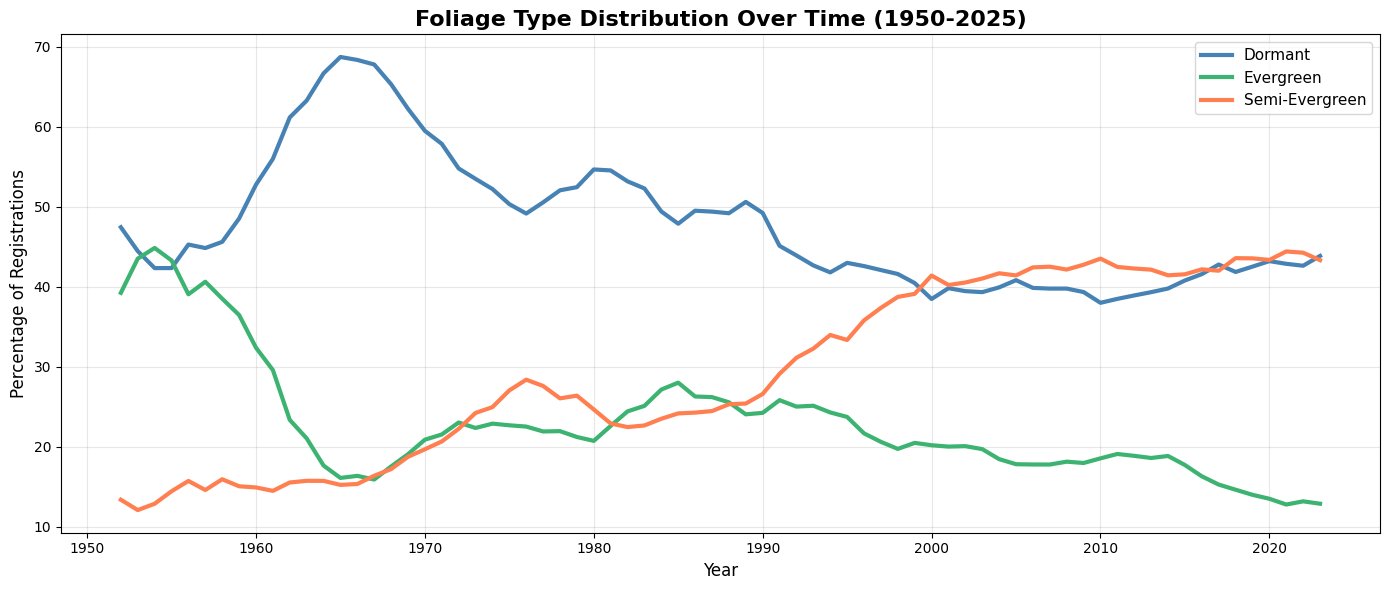

Recent distribution (last 5 years):
  Semi-Evergreen: 44.1%
  Dormant: 42.9%
  Evergreen: 13.0%


In [11]:
# Foliage Type Distribution Over Time
foliage_df = modern_df[modern_df['foliage_type'].notna()].copy()
foliage_yearly = foliage_df.groupby('year')['foliage_type'].value_counts(normalize=True).unstack(fill_value=0)

# 5-year rolling average
foliage_smooth = foliage_yearly.rolling(window=5, center=True).mean()

plt.figure(figsize=(14, 6))
colors = {'Dormant': 'steelblue', 'Evergreen': 'mediumseagreen', 'Semi-Evergreen': 'coral'}

for col in foliage_smooth.columns:
    if col in colors:
        plt.plot(foliage_smooth.index, foliage_smooth[col] * 100, 
                 linewidth=3, label=col, color=colors.get(col, 'gray'))

plt.title(f'Foliage Type Distribution Over Time ({MODERN_START}-{MAX_YEAR})', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Registrations', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Current distribution
recent_foliage = foliage_df[foliage_df['year'] >= MAX_YEAR - 5]['foliage_type'].value_counts(normalize=True) * 100
print(f"Recent distribution (last 5 years):")
for f, pct in recent_foliage.items():
    print(f"  {f}: {pct:.1f}%")

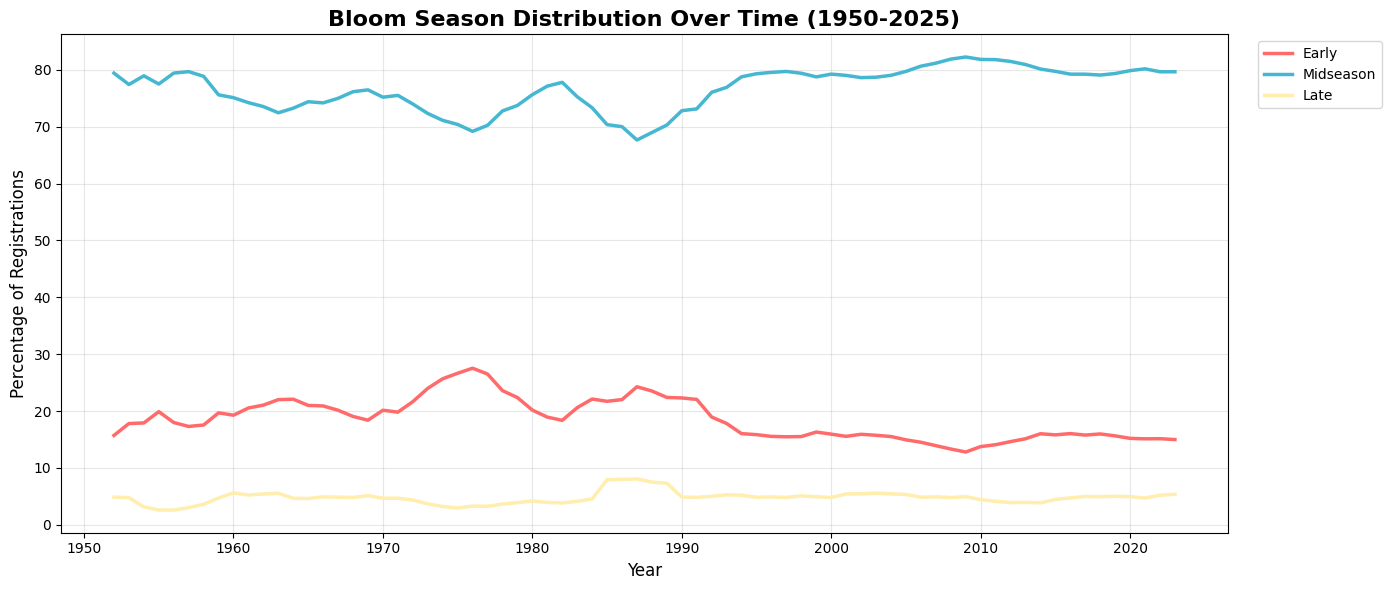

In [12]:
# Bloom Season Distribution Over Time
season_df = modern_df[modern_df['bloom_season'].notna()].copy()

# Extract primary bloom season (before any comma)
season_df['primary_season'] = season_df['bloom_season'].str.split(',').str[0].str.strip()

# Focus on main seasons
main_seasons = ['Early', 'Early Midseason', 'Midseason', 'Late Midseason', 'Late']
season_filtered = season_df[season_df['primary_season'].isin(main_seasons)].copy()

season_yearly = season_filtered.groupby('year')['primary_season'].value_counts(normalize=True).unstack(fill_value=0)

# 5-year rolling average
season_smooth = season_yearly.rolling(window=5, center=True).mean()

plt.figure(figsize=(14, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']

for idx, col in enumerate(main_seasons):
    if col in season_smooth.columns:
        plt.plot(season_smooth.index, season_smooth[col] * 100, 
                 linewidth=2.5, label=col, color=colors[idx % len(colors)])

plt.title(f'Bloom Season Distribution Over Time ({MODERN_START}-{MAX_YEAR})', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Registrations', fontsize=12)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Rebloom Trends
How has the prevalence of reblooming varieties changed over time?

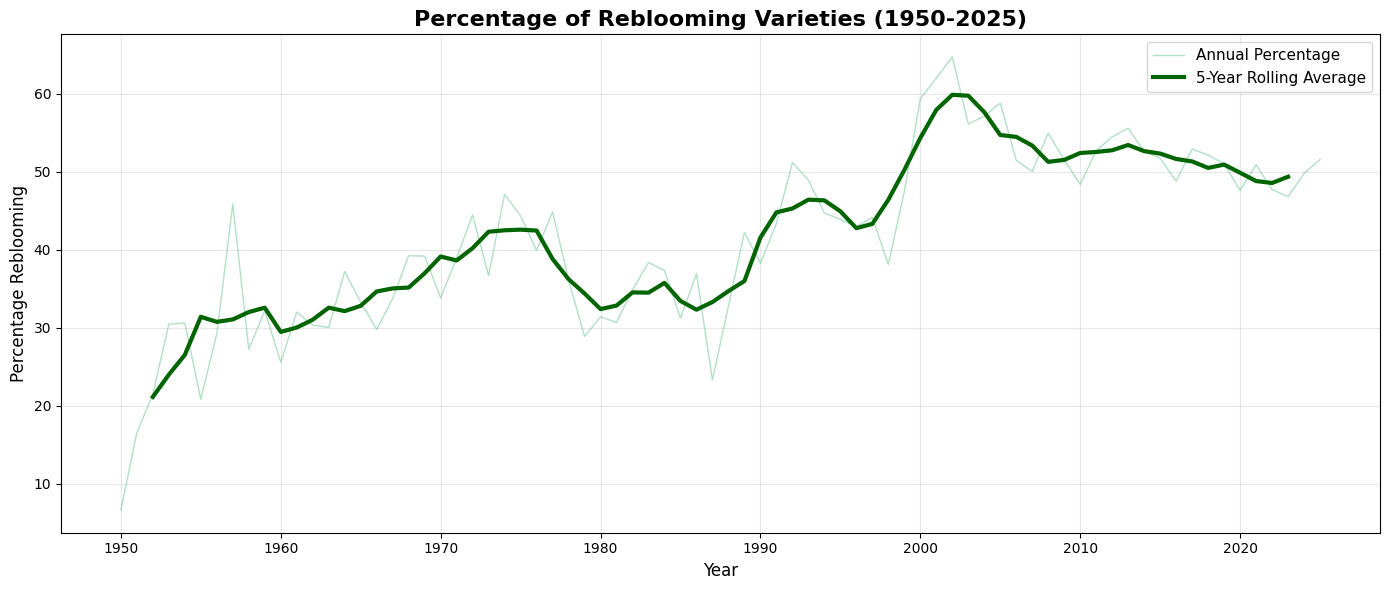

Rebloom prevalence before 1980: 32.8%
Rebloom prevalence (last 10 years): 50.1%


In [13]:
# Rebloom percentage over time
rebloom_df = modern_df.copy()

# Use the rebloom column if available, otherwise check bloom_season
if 'rebloom' in rebloom_df.columns:
    rebloom_yearly = rebloom_df.groupby('year')['rebloom'].mean() * 100
else:
    rebloom_df['is_rebloomer'] = rebloom_df['bloom_season'].str.contains('Rebloom', case=False, na=False)
    rebloom_yearly = rebloom_df.groupby('year')['is_rebloomer'].mean() * 100

rebloom_yearly = rebloom_yearly.reset_index()
rebloom_yearly.columns = ['year', 'pct_rebloom']

# 5-year rolling average
rebloom_yearly['rolling_avg'] = rebloom_yearly['pct_rebloom'].rolling(window=5, center=True).mean()

plt.figure(figsize=(14, 6))
plt.plot(rebloom_yearly['year'], rebloom_yearly['pct_rebloom'], 
         alpha=0.4, color='mediumseagreen', linewidth=1, label='Annual Percentage')
plt.plot(rebloom_yearly['year'], rebloom_yearly['rolling_avg'], 
         linewidth=3, color='darkgreen', label='5-Year Rolling Average')

plt.title(f'Percentage of Reblooming Varieties ({MODERN_START}-{MAX_YEAR})', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Reblooming', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Recent vs historical
early_pct = rebloom_yearly[rebloom_yearly['year'] <= 1980]['pct_rebloom'].mean()
recent_pct = rebloom_yearly[rebloom_yearly['year'] >= MAX_YEAR - 10]['pct_rebloom'].mean()
print(f"Rebloom prevalence before 1980: {early_pct:.1f}%")
print(f"Rebloom prevalence (last 10 years): {recent_pct:.1f}%")

### Summary of Trait Trends

Key observations from the data:

**Quantitative Traits:**
- Bloom sizes have gradually increased over time as breeders select for larger flowers
- Scape heights show considerable variation, with breeders developing both tall landscape varieties and compact container plants
- Bud counts and branching have received more attention in recent decades

**Categorical Traits:**
- Tetraploid varieties have increased significantly since the 1960s when chromosome doubling techniques became widespread
- Foliage preferences vary by region, with evergreen and semi-evergreen types more common in recent registrations
- Midseason remains the dominant bloom period, though breeders have expanded into early and late seasons

**Rebloom:**
- The percentage of reblooming varieties has increased substantially, reflecting breeder and consumer demand for extended bloom periods